# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [109]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [110]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
w_city = []
city_temp = []
humidity = []
cloudines = []
wind_speed = []
lat = []
counter = 0

#Printing a print log
print("Begining Data Retreival")
print("-----------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    print("Processing record "+str(counter)+ " of Set 1: "+ city)
    try:
        counter = counter + 1
        city_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudines.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        w_city.append(city)
        
    except:
        print("City not found...skipping")

Begining Data Retreival
-----------------------
Processing record 0 of Set 1: novyy urengoy
Processing record 1 of Set 1: upernavik
Processing record 2 of Set 1: fairbanks
Processing record 3 of Set 1: chokurdakh
Processing record 4 of Set 1: victoria
Processing record 5 of Set 1: sivagiri
Processing record 6 of Set 1: sukumo
Processing record 7 of Set 1: talnakh
Processing record 8 of Set 1: hobart
Processing record 9 of Set 1: port hawkesbury
Processing record 10 of Set 1: quincy
Processing record 11 of Set 1: saldanha
Processing record 12 of Set 1: saint-philippe
Processing record 13 of Set 1: tulum
Processing record 14 of Set 1: rikitea
Processing record 15 of Set 1: jamestown
Processing record 16 of Set 1: bredasdorp
Processing record 17 of Set 1: deputatskiy
Processing record 18 of Set 1: roma
Processing record 19 of Set 1: kitoy
Processing record 20 of Set 1: barentsburg
City not found...skipping
Processing record 21 of Set 1: paamiut
Processing record 22 of Set 1: arraial do ca

Processing record 189 of Set 1: karlshamn
Processing record 190 of Set 1: nantucket
Processing record 191 of Set 1: wanning
Processing record 192 of Set 1: padre paraiso
Processing record 193 of Set 1: hofn
Processing record 194 of Set 1: iqaluit
Processing record 195 of Set 1: coquimbo
Processing record 196 of Set 1: port elizabeth
Processing record 197 of Set 1: barrow
Processing record 198 of Set 1: cabo san lucas
Processing record 199 of Set 1: boyolangu
Processing record 200 of Set 1: lorengau
Processing record 201 of Set 1: mango
Processing record 202 of Set 1: pangnirtung
Processing record 203 of Set 1: korla
City not found...skipping
Processing record 204 of Set 1: prince george
Processing record 205 of Set 1: port moresby
Processing record 206 of Set 1: ferme-neuve
Processing record 207 of Set 1: popondetta
Processing record 208 of Set 1: galiwinku
City not found...skipping
Processing record 209 of Set 1: nouadhibou
Processing record 210 of Set 1: naze
Processing record 211 of

Processing record 379 of Set 1: tsihombe
City not found...skipping
Processing record 380 of Set 1: grenada
Processing record 381 of Set 1: marovoay
Processing record 382 of Set 1: nyurba
Processing record 383 of Set 1: bukachacha
Processing record 384 of Set 1: bowen
Processing record 385 of Set 1: adrar
Processing record 386 of Set 1: zhanatas
City not found...skipping
Processing record 387 of Set 1: nhulunbuy
Processing record 388 of Set 1: pires do rio
Processing record 389 of Set 1: zyryanka
Processing record 390 of Set 1: maniitsoq
Processing record 391 of Set 1: cam ranh
Processing record 392 of Set 1: sarbi
City not found...skipping
Processing record 393 of Set 1: asosa
Processing record 394 of Set 1: casper
Processing record 395 of Set 1: kholmogory
Processing record 396 of Set 1: thinadhoo
Processing record 397 of Set 1: sri aman
Processing record 398 of Set 1: the pas
Processing record 399 of Set 1: umtata
Processing record 400 of Set 1: taft
Processing record 401 of Set 1: a

Processing record 564 of Set 1: westport
Processing record 565 of Set 1: kangaatsiaq
Processing record 566 of Set 1: carauari
Processing record 567 of Set 1: axim
Processing record 568 of Set 1: zigong
Processing record 569 of Set 1: saint-francois
Processing record 570 of Set 1: mercedes
Processing record 571 of Set 1: grand gaube
Processing record 572 of Set 1: hay river
Processing record 573 of Set 1: medeiros neto
Processing record 574 of Set 1: arlit
Processing record 575 of Set 1: contamana
Processing record 576 of Set 1: nador
Processing record 577 of Set 1: ponnani
Processing record 578 of Set 1: lazarev
Processing record 579 of Set 1: tabou
Processing record 580 of Set 1: araouane
Processing record 581 of Set 1: najran
Processing record 582 of Set 1: el rosario
Processing record 583 of Set 1: sept-iles
Processing record 584 of Set 1: tecoanapa
Processing record 585 of Set 1: sobolevo
Processing record 586 of Set 1: marawi
Processing record 587 of Set 1: bodden town
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [117]:
#Creating dataframe
w_data = {"City Name": w_city,"City Temperature": city_temp,"Humidity": humidity, "Cloudines": cloudines,\
          "Wind Speed":wind_speed,"Latitude": lat}
weather_data = pd.DataFrame(w_data)

#exporting the data into .csv file
weather_data.to_csv("../output_data/cities.csv", index=False, header=True)

#Displaying dataframe
weather_data.head()

,City Name,City Temperature,Humidity,Cloudines,Wind Speed,Latitude
0,novyy urengoy,-6.17,84,48,6.36,66.08
1,upernavik,-18.12,100,0,12.01,72.79
2,fairbanks,11.67,47,88,1.21,64.84
3,chokurdakh,-20.62,82,20,2.16,70.62
4,victoria,27.00,88,90,1.00,5.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

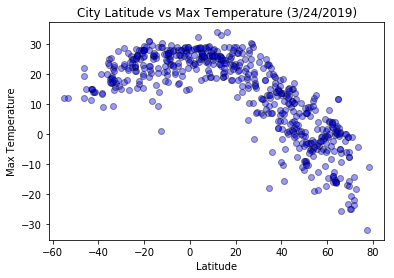

In [113]:
#calculating current date
now = datetime.datetime.now()

#Plotting the Data
plt.scatter(lat, city_temp, marker="o", c= "blue", edgecolor = "black",alpha=0.40)
plt.title("City Latitude vs Max Temperature ("+str(now.month)+"/"+str(now.day)+"/"+str(now.year)+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save Figure
plt.savefig("../Images/latvstemp.png")

#Trend Observation: Upto latitude 20 more or less the temperature is 20 to 30 degrees and as we go further 
#north then the temperature starts dropping linearly with latitude.

#### Latitude vs. Humidity Plot

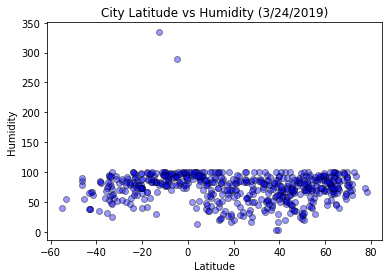

In [114]:
#Plotting the Data
plt.scatter(lat, humidity, marker="o", c= "blue", edgecolor = "black",alpha=0.40)
plt.title("City Latitude vs Humidity ("+str(now.month)+"/"+str(now.day)+"/"+str(now.year)+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save Figure
plt.savefig("../Images/latvshumidity.png")

#Trend observation: The humidity is high above the 0 degree latitude and lesser below 0 degrees.

#### Latitude vs. Cloudiness Plot

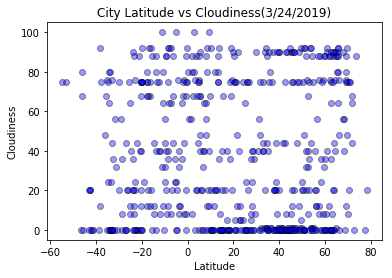

In [115]:
#Plotting the Data
plt.scatter(lat, cloudines, marker="o", c= "blue", edgecolor = "black",alpha=0.40)
plt.title("City Latitude vs Cloudiness("+str(now.month)+"/"+str(now.day)+"/"+str(now.year)+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save Figure
plt.savefig("../Images/latvscloudiness.png")

#Trend observation: There is no direct corelation between latitude and cloudiness. 

#### Latitude vs. Wind Speed Plot

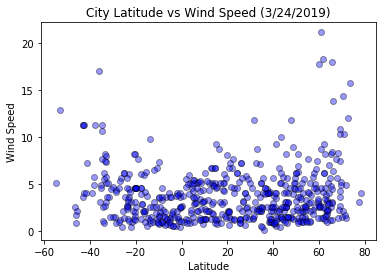

In [116]:
#Plotting the Data
plt.scatter(lat, wind_speed, marker="o", c= "blue", edgecolor = "black",alpha=0.40)
plt.title("City Latitude vs Wind Speed ("+str(now.month)+"/"+str(now.day)+"/"+str(now.year)+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save Figure
plt.savefig("../Images/latvswindsp.png")